# Examen Adelantado - Econometría
# TIPO 1
## 20 de Diciembre 2021

APELLIDOS, NOMBRE: Martinez Diaz, David

### El fichero con las respuestas y códigos debe enviarse a la tarea creada en PRADO para tal efecto.

La base de datos **peliculas.xlsx** cuenta con una muestra de datos sobre de 651 películas estrenadas entre 1970 y 2014, y fue creada para analizar los factores que influyen en la valoración de la audiencia sobre una película. La base de datos cuenta con las siguientes variables:
- _Valoracion_: Puntuación obtenida por la audiencia de la película.
- _Largometraje_: Toma el valor **1** si es un largometraje y **0** si es corto, documental, ...
- _Drama_: **1** si es un drama y **0** si no.
- _Comedia_: **1** si es comedia y **0** si no.
-  _Duracion_: en minutos de la pelicula
- _Estreno_a_: año de estreno de la pelicula.
- _Estreno_m_: mes de estreno de la película.
- _Puntos_Critica_: valoración de los críticos en visionado previo a estreno.
- _Nominacion_MejorPelicula_: si la película fue nominada a mejor película en los Oscars.
- _Premio_MejorActor_: si el actor principal  fue premiado con Óscar a mejor actor.
- _Premio_MejorActriz_: si la actriz principal fue premiada con Óscar a mejor actriz.
- _Premio_MejorPelicula_: si la película fue premiada como mejor película en los Oscars.
- _Premio_MejorDirector_: si la película fue premiada a mejor película en los Oscars.
- _SigloXXI_: **1** si la película se estrenó en el siglo XXI y **0** si se estrenó en el siglo XX.
- _ID_: título de la película evaluada.

Los datos están disponibles en el fichero **peliculas.xlsx**.

### Ejercicio 1
Especifica un modelo de regresión lineal para explicar las valoraciones de las películas en base a $4$ de las variables disponibles (excepto _SigloXXI_). Estima el modelo especificado e interpreta los coeficientes estiados obtenidos.

In [21]:
##Código:

import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import statsmodels.stats.api as sms
from wooldridge import *
import pandas as pd #librería para manejo de datos

datos = pd.read_excel ('peliculas.xlsx') 

Y = datos["Valoracion"]
X = datos[["Duracion", "Puntos_Critica", "Largometraje", "Drama"]]

mco1 = sm.OLS(Y, sm.add_constant(X)).fit()

mco1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Valoracion   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     257.3
Date:                Mon, 20 Dec 2021   Prob (F-statistic):          4.18e-132
Time:                        09:07:57   Log-Likelihood:                -666.00
No. Observations:                 651   AIC:                             1342.
Df Residuals:                     646   BIC:                             1364.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.4049      0.174     25.255      0.000       4.062       4.747
Duracion           0.0084      0.001      5.894      0.000       0.006       0.011
Puntos_Critica     0.0266      0.001     25.668      0.000       0.025       0.029
Largometraje      -0.4228      0.103     -4.097      0.000      -0.625      -0.220
Drama              0.0960      0.058      1.667      0.096      -0.017       0.209
==============================================================================
Omnibus:                       58.000   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.675
Skew:                          -0.565   Prob(JB):                     2.52e-24
Kurtosis:                       4.652   Cond. No.                         858.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Respuesta:

- En primer lugar he decidido hacer un modelo utilizando las siguientes variables exogenas: 
  - "Duracion". 
  - "Puntos_Critica".
  - "Largometraje".
  - "Drama"

- En cuanto a la interpretacion de los resultados:

  -   Tenemos un R cuadrado del 0.614, esto quiere decir que nuestro modelo explica la variable endogena "Valoracion" en un 61%.
  -   Tambien podemos mencionar que como nuestro Prob (F-statistic):	4.18e-132 es menor que el alfa (0.05), podemos decir que el modelo es significativo a nivel global.
  
  -   En cuanto a las variables:
      -   Constante: 1 incremento de esta provoca 4.40 de incremento en nuestra Y y significativa porque el p-valor es < que 0.05.
      -   Duracion: 1 incremento provoca el aumento en 0.0084 de la Y y es significativa a nivel individual porque el p-valor < 0.05.
      - Puntos_Critica: 1 incremento provoca el aumento en 0.0266 de la Y y es significativa a nivel individual porque el p-valor < 0.05.  
      - Largometraje: 1 incremento provoca el decremento en -0.4228 de la Y y es significativa a nivel individual porque el p-valor < 0.05.
      - Drama: 1 incremento provoca el incremento en 0.0960 de la Y y pero no es significativa a nivel individual porque el p-valor > 0.05.


### Ejercicio 2

Justifica que supone la significación global e individual del modelo. Indica los resultados de estos tests en el modelo obtenido tanto a un nivel de significación del 5% como del 10%. ¿Se obtienen conclusiones coherentes de estos?

In [49]:
##Código:
from scipy import stats

n = 651
k = 4

sce = mco1.ess
scr = mco1.ssr

alpha=0.05
f_exp = np.dot(((n-k)/(k-1)), sce/scr)
f_teorica = stats.f.ppf(1-alpha, k-1, n-k)

print("Para un nivel de significacion del 5%: \n")

print("\nF teorica: ", f_teorica)
print("F experimental: ", f_exp)
print("Como nuestra f-experimental es mayor que la f-teorica, se rechaza la hipotesis nula y decimos que tenemos significacion global\n")

#-----------------------------------

alpha=0.1
f_exp = np.dot(((n-k)/(k-1)), sce/scr)
f_teorica = stats.f.ppf(1-alpha, k-1, n-k)

print("Para un nivel de significacion del 10%: \n")
print("\nF teorica: ", f_teorica)
print("F experimental: ", f_exp)
print("Como nuestra f-experimental es mayor que la f-teorica, se rechaza la hipotesis nula y decimos que tenemos significacion global")

Para un nivel de significacion del 5%: 


F teorica:  2.618671813263447
F experimental:  343.63914782707093
Como nuestra f-experimental es mayor que la f-teorica, se rechaza la hipotesis nula y decimos que tenemos significacion global

Para un nivel de significacion del 10%: 


F teorica:  2.0922732763140797
F experimental:  343.63914782707093
Como nuestra f-experimental es mayor que la f-teorica, se rechaza la hipotesis nula y decimos que tenemos significacion global


Respuesta:

- La significacion global del modelo, implica que nivel de conjunto de las variables, tienen la capacidad para afectar al valor que se esta estimando, por lo que la modificacion de los valores de sus coeficientes, implicara un cambio en la prediccion.
- La significacion individual del modelo, implica que a nivel de cada coeficiente, afectara al resultado de la prediccion o a la modificacion del valor de la Y, por ejemplo, en nuestro caso, el coeficiente Drama, al no ser significativo implicara que apenas modifique el valor de nuestra prediccion.
- Como podemos ver, si obtenemos resultados coherentes, ya que como nuestra f-experimental es mayor que la f-teorica, se rechaza la hipotesis nula y decimos que tenemos significacion global.


### Ejercicio 3

Aplica algún test de hipótesis que te permita contrastar si existen diferencias entre el comportamiento de las valoraciones en base a las variables escogidas para las películas estrenadas en el Siglo XX y en el Siglo XXI. Explica el test que has aplicado e interpreta los resultados obtenidos.

In [14]:
##Código:

datosXX = datos[datos["SigloXXI"] == 0]

Y_XX = datosXX["Valoracion"]
X_XX = datosXX[["Duracion", "Puntos_Critica", "Largometraje", "Drama"]]

mco3_XX = sm.OLS(Y, sm.add_constant(X)).fit()

mco3_XX.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Valoracion   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     257.3
Date:                Mon, 20 Dec 2021   Prob (F-statistic):          4.18e-132
Time:                        09:07:56   Log-Likelihood:                -666.00
No. Observations:                 651   AIC:                             1342.
Df Residuals:                     646   BIC:                             1364.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.4049      0.174     25.255      0.000       4.062       4.747
Duracion           0.0084      0.001      5.894      0.000       0.006       0.011
Puntos_Critica     0.0266      0.001     25.668      0.000       0.025       0.029
Largometraje      -0.4228      0.103     -4.097      0.000      -0.625      -0.220
Drama              0.0960      0.058      1.667      0.096      -0.017       0.209
==============================================================================
Omnibus:                       58.000   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.675
Skew:                          -0.565   Prob(JB):                     2.52e-24
Kurtosis:                       4.652   Cond. No.                         858.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
datosXXI = datos[datos["SigloXXI"] == 1]

Y_XXI = datosXX["Valoracion"]
X_XXI = datosXX[["Duracion", "Puntos_Critica", "Largometraje", "Drama"]]

mco3_XXI = sm.OLS(Y, sm.add_constant(X)).fit()

mco3_XXI.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Valoracion   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     257.3
Date:                Mon, 20 Dec 2021   Prob (F-statistic):          4.18e-132
Time:                        09:07:56   Log-Likelihood:                -666.00
No. Observations:                 651   AIC:                             1342.
Df Residuals:                     646   BIC:                             1364.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.4049      0.174     25.255      0.000       4.062       4.747
Duracion           0.0084      0.001      5.894      0.000       0.006       0.011
Puntos_Critica     0.0266      0.001     25.668      0.000       0.025       0.029
Largometraje      -0.4228      0.103     -4.097      0.000      -0.625      -0.220
Drama              0.0960      0.058      1.667      0.096      -0.017       0.209
==============================================================================
Omnibus:                       58.000   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.675
Skew:                          -0.565   Prob(JB):                     2.52e-24
Kurtosis:                       4.652   Cond. No.                         858.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
scrXX=mco3_XX.ssr
scrXXI=mco3_XXI.ssr
scr = mco1.ssr
n = mco1.nobs

k=4

alpha=0.05
Fteo= stats.f.ppf(1-alpha,k+1,n-2*k-1)

#Test de chow
Fexp = ((n-(2*k)-2)/(k-1)) * ((scr-(scrXX+scrXXI))/(scrXX+scrXXI))

print("La F-teorico: ", Fteo)
print("La F-experimental: ", Fexp)

print("Como nuestra f-experimental es mas pequeño que f-teorico, no rechazamos la hipotesis nula, por lo que podemos decir que coincide las betas de XXI y XX")

La F-teorico:  2.2280609714381163
La F-experimental:  -106.83333333333333
Como nuestra f-experimental es mas pequeño que f-teorico, no rechazamos la hipotesis nula, por lo que podemos decir que coincide las betas de XXI y XX


Respuesta:

- En primer lugar, he decidido utilizar el test de chow, el cual me permite saber si los coeficientes en dos regresiones lineales en dos sets de datos son iguales.

  - La hipótesis nula del test de Chow será que $${\displaystyle a_{1}=a_{2}}, {\displaystyle b_{1}=b_{2}}.$$

  - El estadístico del test se comporta como una distribución F con k $$ {\displaystyle N_{1}+N_{2}-2k}.$$
  - grados de libertad
- Interpretacion de los resultados 

  -   La F-teorico:  2.2280609714381163
  -   La F-experimental:  -106.83333333333333
  -   Como nuestra f-experimental es mas pequeño que f-teorico, no rechazamos la hipotesis nula, por lo que podemos decir que coincide las betas de XXI y XX

### Ejercicio 4

Analiza si los datos presentan un problema de multicolinealidad con las medidas de detección que conozcas, y en caso de existir este problema, explica cómo puedes paliar el problema en el modelo.

In [23]:
##Código:

print("Nuestro condition number es: ", mco1.condition_number)
print("Tendriamos un problema grave de multicolinealidad si fuese mayor que 900.")

Nuestro condition number es:  858.2105206769918
Tendriamos un problema grave de multicolinealidad si fuese mayor que 900.


In [30]:
import statsmodels.stats.outliers_influence as oi

print("Test de los Vifs:")
print("--> Factor de inflacion de la varianza, con el for hacemos que salga  para toda las variables")
print("--> Hay problema de multicolinealidad, si vif es mayor que 10 y si es mayor que 20, problema grave\n")

vifs=[oi.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifs)

print("Por lo que nuestra Duracion y Largometraje, presenta problemas de multicolinealidad")

Test de los Vifs:
--> Factor de inflacion de la varianza, con el for hacemos que salga  para toda las variables
--> Hay problema de multicolinealidad, si vif es mayor que 10 y si es mayor que 20, problema grave

[16.89769287754869, 5.495876635093889, 10.22701105529979, 2.1046761770901514]
Por lo que nuestra Duracion y Largometraje, presenta problemas de multicolinealidad


Matriz de autocorrelacion: 
[[ 1.          0.17134557  0.12871722  0.24196057]
 [ 0.17134557  1.         -0.32140338  0.14990769]
 [ 0.12871722 -0.32140338  1.          0.25658523]
 [ 0.24196057  0.14990769  0.25658523  1.        ]]

 Lo ideal es que la matriz fuese la identidad
Matriz de autocorrelacion a nivel visual: 


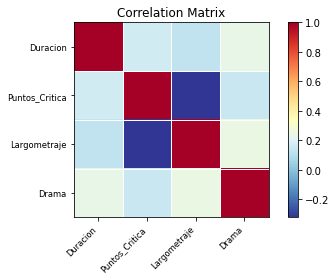

In [31]:
#Matriz de correlacciones
print("Matriz de autocorrelacion: ")
corr_matrix=np.corrcoef(X.T) #X.T = matriz X traspuesta
print(corr_matrix)

print("\n Lo ideal es que la matriz fuese la identidad")
import statsmodels.graphics.api as smg
print("Matriz de autocorrelacion a nivel visual: ")
smg.plot_corr(corr_matrix, xnames=["Duracion", "Puntos_Critica", "Largometraje", "Drama"])
plt.show()

- Respuesta:
  - En primer lugar comprobamos nuestro condition number es:  858.2105206769918
    - Tendriamos un problema grave de multicolinealidad si fuese mayor que 900.
  - Luego hemos realizado el test de los vifs para saber la inflacion de la varianza en las variables:
    - [16.89769287754869, 5.495876635093889, 10.22701105529979, 2.1046761770901514]
    - Por lo que nuestra Duracion y Largometraje, presenta problemas de multicolinealidad pero no muy graves.

  - Finalmente, podemos ver la matriz de autocorrelacion para comprobar las variables a nivel visual y es mas o menos lo que habiamos dicho.

- Si tuviesemos que solucionarlo (aunque no es encesario en nuestro caso): 
  
  - Deberiamos eliminar dichas variables que tenga una alta relacion eentre ellas, hablando de las variables exogenas.
  - Comprobar que no se produzcan combinacion lineales entre las variables independientes.
  - Tambien se podria aplicar logaritmos a los datos (pero a mi a nivel practico no me funciona).

### Ejercicio 5

Extrae los residuos de tu modelo y chequea si estos siguen una distribución normal gráficamente y con algún test de hipótesis ¿Que consecuencias tendría en tu modelo que no se cumpliera esta hipótesis? Justifica detalladamente la respuesta.

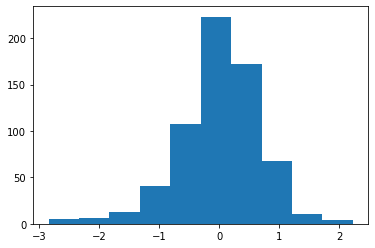

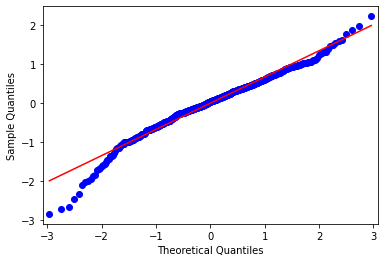

In [45]:
##Código:

# Grafica de los residuos
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot
pyplot.hist(mco1.resid)
pyplot.show()
qqplot(mco1.resid, line='s')
pyplot.show()

In [46]:
import statsmodels.stats.diagnostic as diag

print("Aplicamos el test de kolmogorov-smirnov:")
diag.kstest_normal(mco1.resid)

Aplicamos el test de kolmogorov-smirnov:


(0.06245607696864991, 0.0009999999999998899)

Respuesta:

- En primer lugar podemos ver a traves de la primera grafica que se presenta una camapana de Gauss, caracteristicas de una distribucion normal.
- En la segunda grafica, podemos ver como la mayoria de los residuos se ajusta a la recta, por lo que tambien podemos corroborar que siguien una distribucion normal.
- Con el test de kolmogorov-smirnov podemos ver que el p-valor es mayor que alfa (0.05), por lo que definitivamente corroboramos que se trata de una distribucion normal


- Consecuencias de no seguir una distribucion normal:

  - No se aceptaria las hipotesis mas basica de la econometria por lo que no se podrian hacer estimaciones ni predicciones.
  - Y los test que realicemos no tendran ninguna validez, ya sea el r-squared, los test experimentales o cualquier otro.



### Ejercicio 6

¿En qué consiste el test de Glejser y qué permite detectar? Aplícalo a tus datos con alguna de las variables que sospeches que podría suponer un problema y comenta los resultados obtenidos.

In [40]:
##Código:

#"Duracion", "Puntos_Critica", "Largometraje", "Drama"
z=datos["Duracion"]
for h in [0.5,1,2]:
    mcoaux=sm.OLS(abs(mco1.resid),sm.add_constant(z**h)).fit()
    pval=mcoaux.pvalues[1]
    print("h: ",h,"-> pvalt:",pval,"R2: ", mcoaux.rsquared)
    
#nos fijamos en los pvalores mas pequenios que 0.05, y dentro de eso los que tienen el R cuadrado mas grande, 
#si lo rechazo tengo un problema, de esas cual es la que tiene el R cuadrado mas grande, Z^2, se corrige con minimos 
#cuadrados ponderados, multiplicando mis datos por 1/sqrt(Z^2)

mcp = sm.WLS(Y, sm.add_constant(X),weights=1./np.sqrt (z**0.5)).fit() # minimos cuadrados ponderados
mcp.summary()


h:  0.5 -> pvalt: 0.04342082598780415 R2:  0.006270067258391299
h:  1 -> pvalt: 0.06366171775471681 R2:  0.005289465128469284
h:  2 -> pvalt: 0.20813031523177314 R2:  0.002440169003822934


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:             Valoracion   R-squared:                       0.615
Model:                            WLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     258.4
Date:                Mon, 20 Dec 2021   Prob (F-statistic):          1.83e-132
Time:                        09:25:49   Log-Likelihood:                -668.42
No. Observations:                 651   AIC:                             1347.
Df Residuals:                     646   BIC:                             1369.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.3873      0.176     24.985      0.000       4.042       4.732
Duracion           0.0086      0.001      5.845      0.000       0.006       0.012
Puntos_Critica     0.0267      0.001     25.747      0.000       0.025       0.029
Largometraje      -0.4305      0.103     -4.185      0.000      -0.632      -0.229
Drama              0.0928      0.058      1.602      0.110      -0.021       0.207
==============================================================================
Omnibus:                       59.317   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.374
Skew:                          -0.572   Prob(JB):                     3.97e-25
Kurtosis:                       4.683   Cond. No.                         851.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Respuesta:

- El test de Glejser es un test de heterocedasticidad para modelos aditivos de la desviación estándar en función de variables exógenas. 
  
  - Se toma como variable dependiente la raíz cuadrada del
estimador de las varianzas en función de las variables
exógenas.
  - Después de obtener los residuales ûi de la regresión MCO, Glejser sugiere regresar los valores absolutos de ûi sobre la variable X que se cree que está muy asociada con σi².


- Interpretacion de los resultados:

  -   El unico que daba problemas era la variable Duracion, ya que para h=0.5, su p-valor era menor que el alfa (0.05), por lo que ahi tendriamos un problema de heterocedasticidad.
  
- Para solucionarlo:
    -   Debemos de utilizar un nuevo modelo aplicando la exponencial del valor que nos provocaba problemas de heterocedasticidad por su h (en este caso 0.5), utilizando minimos cuadrados ponderados.


### Ejercicio 7

Explica en qué consiste el problema de Autocorrelación. Justifica si existe este problema en tu modelo, y en caso afirmativo, aplica alguna técnica para su corrección.

In [43]:
##Código:

from statsmodels.stats.stattools import durbin_watson #Si DW es 0, correlacion positiva, si es 4, correlacion negativa y si es 2 es incorrelaccionado, si no es alguno de esos valores me fijo en las tablas
dw=durbin_watson(mco1.resid) #con el DW 0.066 tengo un problema de correlacion positiva

print ("Nuestro durbin-watson: ", dw, "--> Miramos en la tabla")
print("DL = 1.738, Du = 1.799")
print("--> Por tanto nuestro modelo presenta unos residuos incorrelados")

Nuestro durbin-watson:  2.0459559701099033 --> Miramos en la tabla
DL = 1.738, Du = 1.799
--> Por tanto nuestro modelo presenta unos residuos incorrelados


In [44]:
# Aun asi vamos a utilizar cochrane orcutt (test de los rho):

rho= 1 - dw/2 # ro estimado inicial

print (rho) # rho inicial
mco_autocorr=sm.GLSAR(Y, sm.add_constant(X), rho=rho) # minimos cuadrados generalizados
res = mco_autocorr.iterative_fit(maxiter=2000, rtol = 100**(-10)) # iteraciones y tolerancia, la tolerancia es si entre un rho y otro hay muy poca diferencia paro (10^-10)

print ('Iterations used = %d Converged %s' % (res.iter, res.converged) )
print ('Rho = ', mco_autocorr.rho)
res.summary()

-0.022977985054951633
Iterations used = 13 Converged True
Rho =  [-0.02567963]


<class 'statsmodels.iolib.summary.Summary'>
"""
                           GLSAR Regression Results                           
==============================================================================
Dep. Variable:             Valoracion   R-squared:                       0.614
Model:                          GLSAR   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     257.0
Date:                Mon, 20 Dec 2021   Prob (F-statistic):          6.25e-132
Time:                        09:30:01   Log-Likelihood:                -665.03
No. Observations:                 650   AIC:                             1340.
Df Residuals:                     645   BIC:                             1362.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.4140      0.175     25.269      0.000       4.071       4.757
Duracion           0.0083      0.001      5.795      0.000       0.006       0.011
Puntos_Critica     0.0266      0.001     25.694      0.000       0.025       0.029
Largometraje      -0.4201      0.103     -4.069      0.000      -0.623      -0.217
Drama              0.1005      0.058      1.745      0.082      -0.013       0.214
==============================================================================
Omnibus:                       59.261   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.444
Skew:                          -0.575   Prob(JB):                     6.31e-25
Kurtosis:                       4.671   Cond. No.                         880.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Respuesta:

- En primer lugar vamos a utilizar el test de Durbin-Watson el cual nos permite saber si nuestros residuos estan incorrelados:
  - Resultados:
    - Nuestro durbin-watson:  2.0459559701099033 -->
    - Miramos en la tabla --> DL = 1.738, Du = 1.799
    - Por tanto nuestro modelo presenta unos residuos incorrelados.

- Si nos diesen unos residuos correlados, deberiamos aplicar en este caso el test de los rho, que ajusta un modelo lineal de correlación serial en el término de error.

- La idea es transformar el modelo de regresi´on en un modelo cuyo t´ermino de error
sea ruido blanco. Dada la relacion entre Yt y ut, podemos definir directamente las variables
- Utilizando un nuevo modelo de minimos cuadrados generalizados.

